In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer


In [42]:
data = pd.read_excel('data/full_data.xlsx',sheet_name='Sheet1')

In [48]:
with open('serbian_stopwords.txt') as f:
    lines = f.readlines()
stopwords = []
for line in lines:
    stopwords.append(line[:-1])

Removing reviews without a grade:

In [3]:
missing = 100*(data[data.Rating == 0].shape[0])/(data.shape[0])
print('Percentage of reviews without a grade: ' + str(missing) + '%')
data = data[data.Rating > 0]

Percentage of reviews without a grade: 2.183718063648588%


Creating a label:

In [4]:
data["Label"] = 0
data.loc[data.Rating >= 3.5,["Label"]] = 1
data[['Rating','Label']].describe().transpose().drop('count',axis=1)  

,mean,std,min,25%,50%,75%,max
Rating,4.444125,0.891965,1.0,4.3,4.8,5.0,5.0
Label,0.889035,0.314091,0.0,1.0,1.0,1.0,1.0


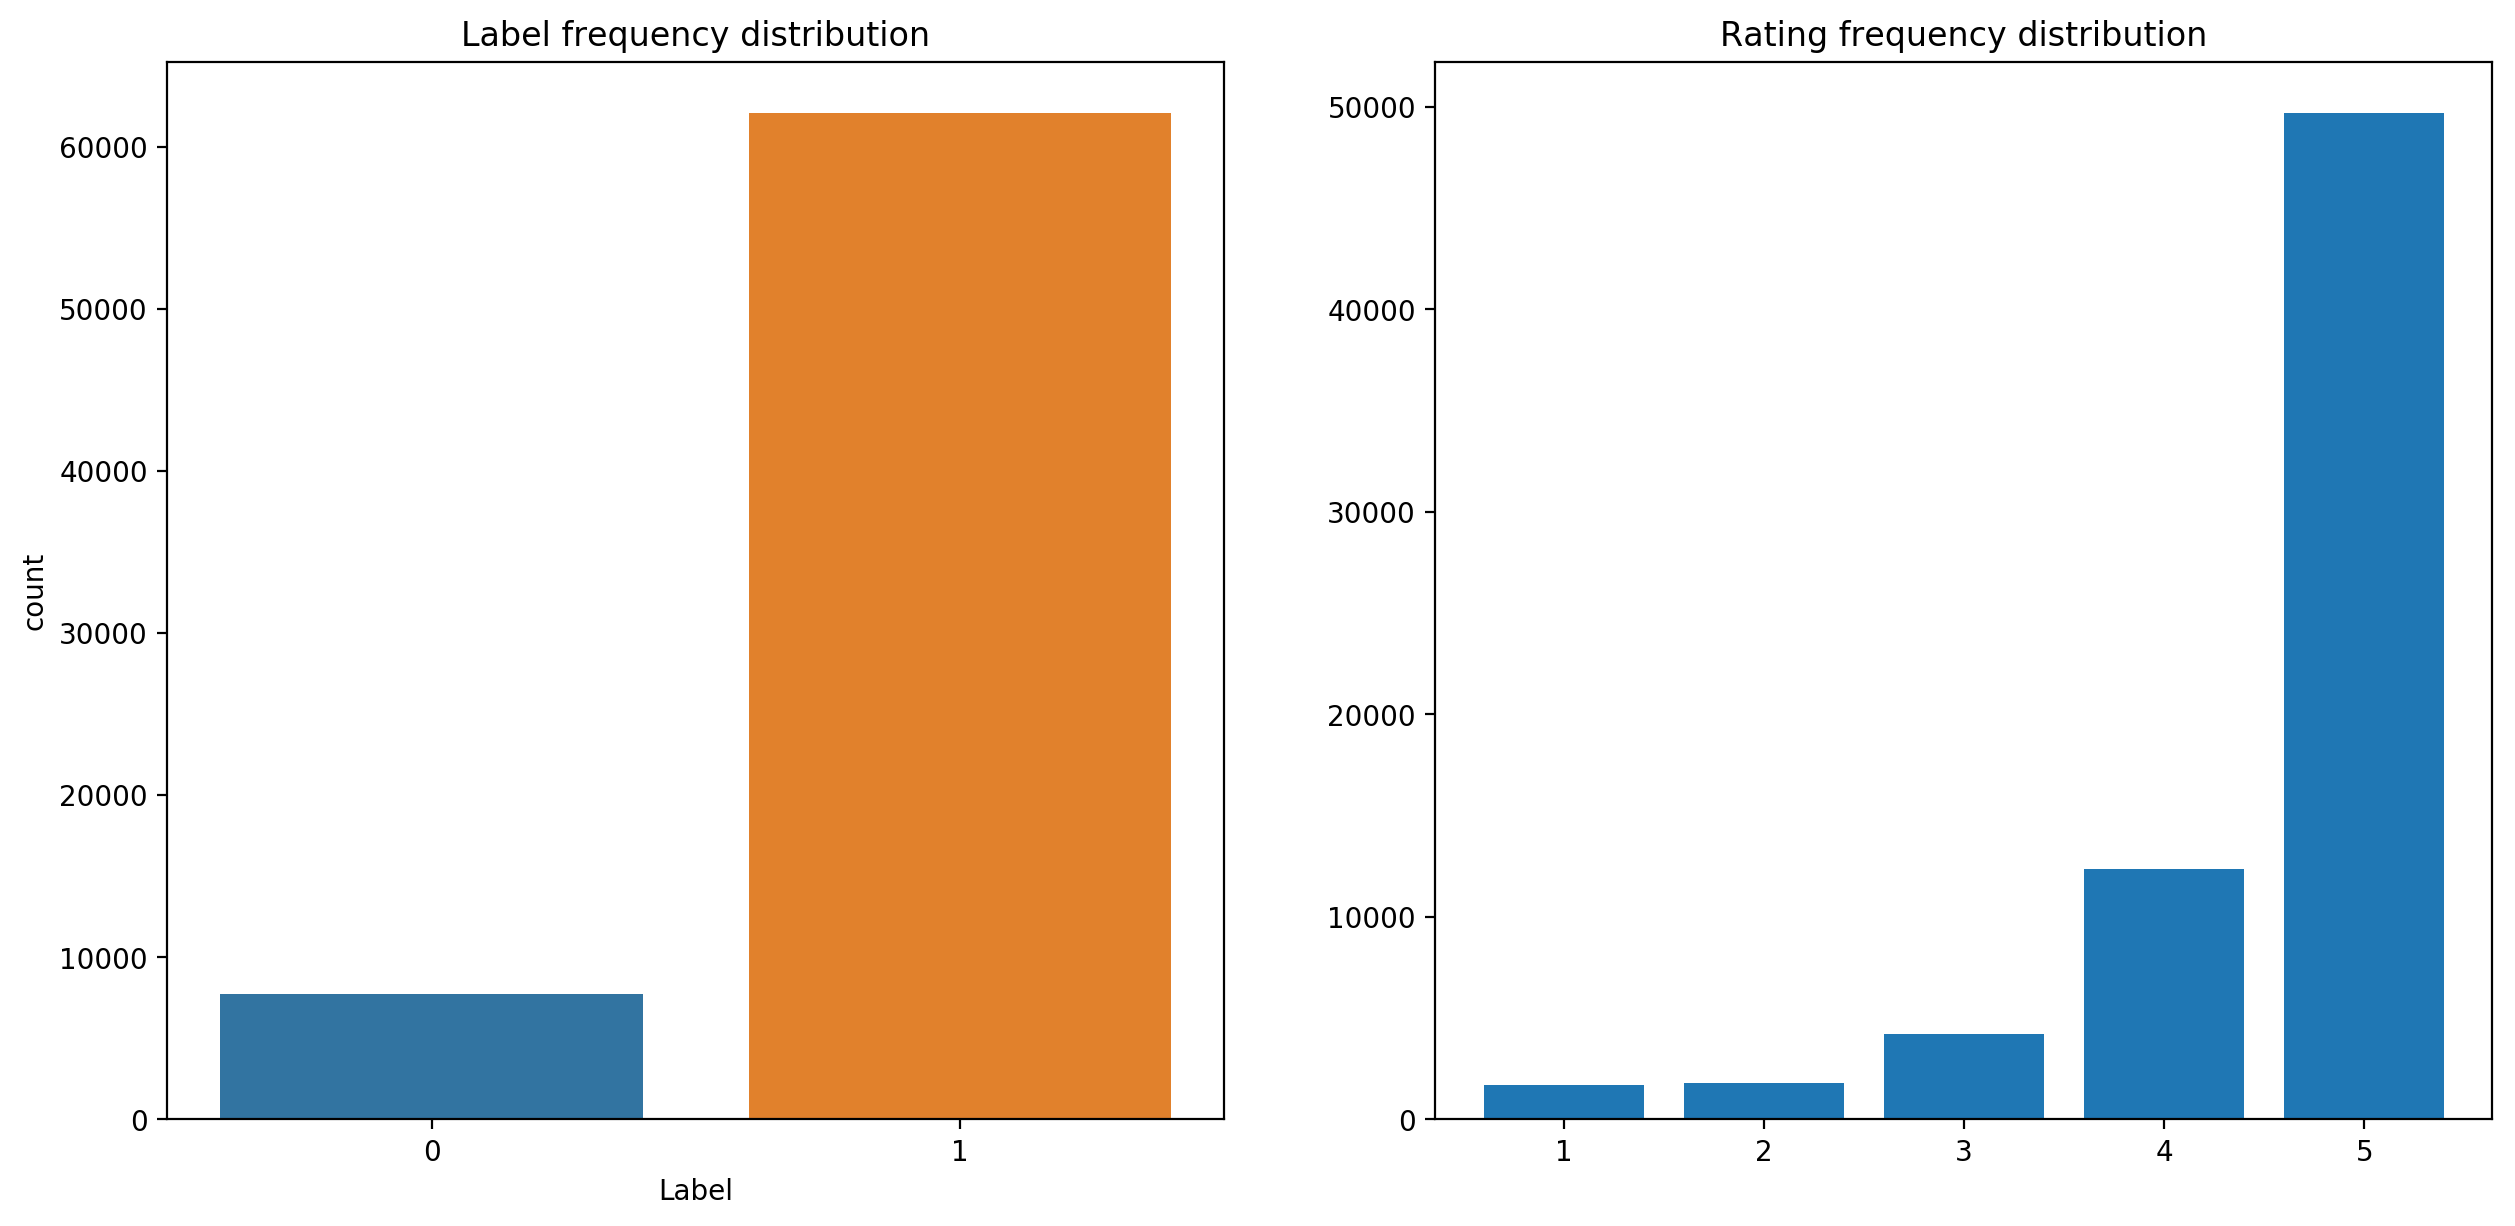

In [5]:
rating_distribution = { 1: data[data.Rating < 1.5].shape[0],
                        2: data[(data.Rating >= 1.5) & (data.Rating < 2.5)].shape[0],
                        3: data[(data.Rating >= 2.5) & (data.Rating < 3.5)].shape[0],
                        4: data[(data.Rating >=3.5) & (data.Rating < 4.5)].shape[0],
                        5: data[data.Rating >= 4.5].shape[0]
                      }
plt.figure(figsize=(15, 7), dpi=200)   
plt.subplot(121)
plt.title('Label frequency distribution')
sns.countplot(data.Label)
plt.subplot(122)
plt.bar(rating_distribution.keys(),rating_distribution.values())
plt.title('Rating frequency distribution')
plt.show()

As we can see vast majority of reviews has high score.

In [6]:
data["Title Character Count"] = data['Title'].str.len()
data["Review Character Count"] = data['Content'].str.len()
data[['Title Character Count','Review Character Count']].describe().transpose().drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Title Character Count,11.563718,8.435788,1.0,6.0,9.0,15.0,133.0
Review Character Count,91.168075,127.955246,1.0,18.0,48.0,112.0,2215.0


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
data['Tokenized Title'] = data['Title'].str.lower().str.strip().str.split('[\W_]+')
data['Tokenized Review'] = data['Content'].str.lower().str.strip().str.split('[\W_]+')
data.dropna(subset=['Tokenized Title','Tokenized Review'],inplace=True)
for i,row in data.iterrows():
    data.loc[i,'Title word count'] = len(row['Tokenized Title'])
    data.loc[i,'Review word count'] = len(row['Tokenized Review'])

In [18]:
data[['Title word count','Review word count']].describe().transpose().drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Title word count,2.080123,1.403208,1.0,1.0,2.0,3.0,21.0
Review word count,16.105685,22.390011,1.0,3.0,9.0,20.0,419.0


In [40]:
def remove_diacritics(text):
    text = text.replace('ć','c')
    text = text.replace('č','c')
    text = text.replace('š','s')
    text = text.replace('ž','z')
    text = text.replace('đ','d')
    return text

def preprocess(words):
    result = [w.lower() for w in words]
    result = [remove_diacritics(w) for w in result if not w in stopwords]
    return result
